In [206]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [207]:
path = r'C:\Users\kshifera\Desktop\CF_Course\Immersion\Achievement_4\Instacart Basket Analysis'

In [208]:
# import dataframe
df = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data' , 'df_chunk1.pkl'))

### 5. Customer profiling

#### Customer profiling is done using based on income and age. To make the classification, the following basic statistics is conducted on the variables.

In [209]:
df['income'].describe()

count    2.441488e+07
mean     9.989505e+04
std      4.333357e+04
min      2.590300e+04
25%      6.752400e+04
50%      9.683600e+04
75%      1.281600e+05
max      5.939010e+05
Name: income, dtype: float64

In [210]:
df['age'].describe()

count    2.441488e+07
mean     4.945734e+01
std      1.848532e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

### For the purpose of analyses the following classification is assumed:
Income is grouped in to four based on income quartile. Accordingly, those in the first quartile are low income (< 67,004), the next group are low middle income (67,004 to 96,618), the following upper middle income (96,618 to 127,912) and those in the final quartile (> 127,912) are in upper income group.

age follows the following classification: below 30 years of age are young adults, between 30 and 65 are adults, and above 65 are seniors.
consequently, we have the following customer profiles:
  1. low-income, young adult
  2. low-income, adult
  3. low-income, senior
  4. lower-middle income, young adult
  5. lower-middle income, adult
  6. lower-middle income, senior
  7. upper-middle income, young adult
  8. upper-middle income, adult
  9. upper-middle income, senior
  10. high-income, young adult
  11. high-income, adult
  12. high-income, senior
  

### Based on these, the customer profiles are defined in the dataframe

In [211]:
# Define low-income, young adult group
df.loc[(df['age'] < 30) & (df['income'] < 67004), 'customer_profile'] = 'low-income, young adult'

In [212]:
# Define low-income, adult group
df.loc[(df['age'] >= 30) & (df['age'] < 65) & (df['income'] < 67004) , 'customer_profile'] = 'low-income, adult'

In [213]:
# Define low-income, senior group
df.loc[(df['age'] >= 65) & (df['income'] < 67004), 'customer_profile'] = 'low-income, senior'

In [214]:
# Define lower-middle income, young adult group
df.loc[(df['age'] < 30) & (df['income'] >= 67004) & (df['income'] < 96618), 'customer_profile'] = 'lower-middle income, young adult'

In [215]:
# Define lower-middle income, adult group
df.loc[(df['age'] >= 30) & (df['age'] < 65) & (df['income'] >= 67004) & (df['income'] < 96618), 'customer_profile'] = 'lower-middle income, adult'

In [216]:
# Define lower-middle income, senior group
df.loc[(df['age'] >= 65) & (df['income'] >= 67004) & (df['income'] < 96618), 'customer_profile'] = 'lower-middle income, senior'

In [217]:
# Define upper-middle income, young adult group
df.loc[(df['age'] < 30) & (df['income'] >= 96618) & (df['income'] < 127912), 'customer_profile'] = 'upper-middle income, young adult'

In [218]:
# Define upper-middle income, adult group
df.loc[(df['age'] >= 30) & (df['age'] < 65) & (df['income'] >= 96618) & (df['income'] < 127912), 'customer_profile'] = 'upper-middle income, adult'

In [219]:
# Define upper-middle income, senior group
df.loc[(df['age'] >= 65) & (df['income'] >= 96618) & (df['income'] < 127912), 'customer_profile'] = 'upper-middle income, senior'

In [220]:
# Define high-income, young adult group
df.loc[(df['age'] < 30) & (df['income'] >= 127912), 'customer_profile'] = 'high-income, young adult'

In [221]:
# Define high-income, adult group
df.loc[(df['age'] >= 30) & (df['age'] < 65) & (df['income'] >= 127912), 'customer_profile'] = 'high-income, adult'

In [222]:
# Define high-income, senior group
df.loc[(df['age'] >= 65) & (df['income'] >= 127912), 'customer_profile'] = 'high-income, senior'

### The customer profile identified above can be crosstabulated with the number of dependents in each customer group as follows:

In [223]:
# Crosstab indicating proportion of number of dependents in each customer profile
x_cp_nd = pd.crosstab(df['customer_profile'], df['number_of_dependents'], normalize = 'index')
x_cp_nd

number_of_dependents,0,1,2,3
customer_profile,,,,
"high-income, adult",0.256774,0.247724,0.245811,0.249691
"high-income, senior",0.245499,0.244771,0.255853,0.253877
"high-income, young adult",0.203151,0.262793,0.278747,0.255309
"low-income, adult",0.254789,0.244368,0.251625,0.249219
"low-income, senior",0.235693,0.261690,0.252166,0.250451
"low-income, young adult",0.246467,0.251071,0.246145,0.256316
"lower-middle income, adult",0.245996,0.252864,0.247664,0.253476
"lower-middle income, senior",0.250040,0.243434,0.262774,0.243752
"lower-middle income, young adult",0.249577,0.253970,0.247145,0.249308


#### There seems to be an even distribution of number of dependents among the different customer profiles


### 6. Visualization for distribution of profiles

In [224]:
df['customer_profile'].value_counts()

customer_profile
high-income, adult                  3595029
upper-middle income, adult          3544536
lower-middle income, adult          3131341
low-income, adult                   3095261
high-income, senior                 2488216
upper-middle income, senior         2282205
lower-middle income, young adult    2147184
low-income, young adult             2082053
lower-middle income, senior          877734
low-income, senior                   810295
upper-middle income, young adult     305173
high-income, young adult              55850
Name: count, dtype: int64

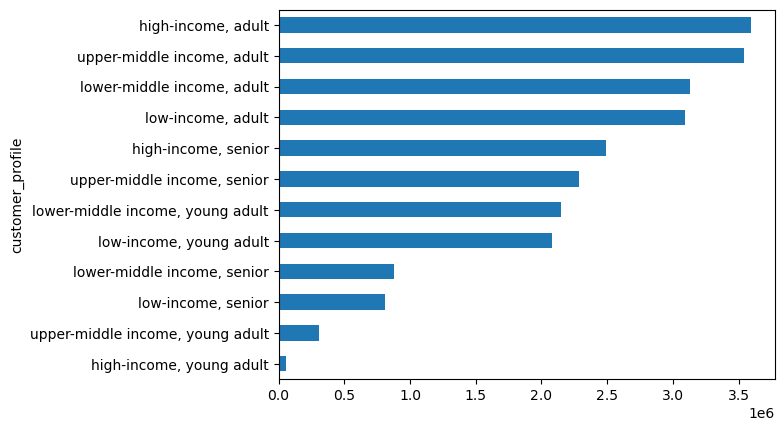

In [225]:
# we create a horizontal bar chart to visualize the distribution of customer profiles
bar = df['customer_profile'].value_counts().sort_values().plot(kind ='barh')
                        

In [331]:
# Export the chart
bar.figure.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'barh_1.png'))

( Note: The numbers on the horizontal are in millions)

#### The visualization clearly depicts that the proportion of high-income, adult group is the highest, while that of high-income, young adult is the lowest, perhaps alluding to the fact that it takes a while to have high income! On the other hand, irrespective of their incomes, the top customers of the Instacart are the adult age group. 

### 7. Aggregation of customer profiles based on their usage frequency and expenditure 

In [226]:
# mean, min and max values of usage frequency of customer profiles
usage_frequency = df.groupby('customer_profile').agg({'days_since_prior_order': ['mean' , 'min' , 'max']})
usage_frequency

days_since_prior_order           
                                                   mean  min   max
customer_profile                                                  
high-income, adult                            10.067508  0.0  30.0
high-income, senior                           10.004289  0.0  30.0
high-income, young adult                       9.420161  0.0  30.0
low-income, adult                             10.185615  0.0  30.0
low-income, senior                            10.321906  0.0  30.0
low-income, young adult                       10.193614  0.0  30.0
lower-middle income, adult                    10.037629  0.0  30.0
lower-middle income, senior                    9.909195  0.0  30.0
lower-middle income, young adult              10.004431  0.0  30.0
upper-middle income, adult                    10.051700  0.0  30.0
upper-middle income, senior                   10.134371  0.0  30.0
upper-middle income, young adult              10.275142  0.0  30.0

In [227]:
# mean, min and max values of expenditure of customer profiles
expenditure = df.groupby('customer_profile').agg({'prices':['mean', 'min' , 'max']})
expenditure

prices              
                                        mean  min      max
customer_profile                                          
high-income, adult                 20.842343  1.0  99999.0
high-income, senior                16.903986  1.0  99999.0
high-income, young adult          281.996038  1.0  99999.0
low-income, adult                   7.278045  1.0  14900.0
low-income, senior                  6.709261  1.0     25.0
low-income, young adult             7.600615  1.0  14900.0
lower-middle income, adult          8.661349  1.0  99999.0
lower-middle income, senior         8.766952  1.0  99999.0
lower-middle income, young adult    8.859249  1.0  99999.0
upper-middle income, adult          9.374225  1.0  99999.0
upper-middle income, senior         8.707137  1.0  99999.0
upper-middle income, young adult   17.442318  1.0  99999.0

### 8. Analysis by regions

#### 8.1. Northeast region

In [228]:
# subset of the dataframe for the Northeast region
df_ne = df[df['region'] == 'Northeast']

In [229]:
# customer count in the region
df_ne['user_id'].value_counts().sum()

4315271

#### 8.1.1. Demographic outlook

In [230]:
# customer profile
df_ne['customer_profile'].value_counts()

customer_profile
upper-middle income, adult          632369
high-income, adult                  622255
low-income, adult                   550405
lower-middle income, adult          521727
high-income, senior                 458112
upper-middle income, senior         409439
lower-middle income, young adult    400178
low-income, young adult             359069
lower-middle income, senior         157370
low-income, senior                  151958
upper-middle income, young adult     44806
high-income, young adult              7583
Name: count, dtype: int64

In [231]:
# prevailing family status
df_ne['family_status'].value_counts()

family_status
married                             3045202
single                               684778
divorced/widowed                     380360
living with parents and siblings     204931
Name: count, dtype: int64

In [232]:
# number of dependents
df_ne['number_of_dependents'].value_counts()

number_of_dependents
3    1094308
1    1087111
2    1068714
0    1065138
Name: count, dtype: int64

#### 8.1.2. Spending habits 

In [233]:
# region spending statistics
df_ne['prices'].describe()

count    4.315271e+06
mean     1.129023e+01
std      4.473718e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.120000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [234]:
# customer spending habits
df_ne['spending_flag'].value_counts(dropna = False)

spending_flag
Low spender     4232654
High spender      82617
Name: count, dtype: int64

In [235]:
# proportion of customer spending habits by customer profile
ne_profile = pd.crosstab(df_ne['customer_profile'], df_ne['spending_flag'], normalize = 'index')
ne_profile

spending_flag,High spender,Low spender
customer_profile,,
"high-income, adult",0.061075,0.938925
"high-income, senior",0.035212,0.964788
"high-income, young adult",1.000000,0.000000
"low-income, adult",0.001544,0.998456
"low-income, senior",0.000000,1.000000
"low-income, young adult",0.002331,0.997669
"lower-middle income, adult",0.006975,0.993025
"lower-middle income, senior",0.004887,0.995113
"lower-middle income, young adult",0.010308,0.989692


In [236]:
# product price ranges customers spend prefer
ne_prepri = pd.crosstab(df_ne['customer_profile'], df_ne['price_range_loc'], normalize = 'index')
ne_prepri

price_range_loc,High range product,Low range product,Mid range product
customer_profile,,,
"high-income, adult",0.014554,0.300051,0.685396
"high-income, senior",0.014494,0.294240,0.691265
"high-income, young adult",0.020177,0.313860,0.665963
"low-income, adult",0.008614,0.361376,0.630011
"low-income, senior",0.005212,0.407803,0.586985
"low-income, young adult",0.010767,0.332167,0.657066
"lower-middle income, adult",0.013212,0.296180,0.690608
"lower-middle income, senior",0.013300,0.301601,0.685099
"lower-middle income, young adult",0.012942,0.300979,0.686080


#### 8.1.3. Ordering habits

In [237]:
# region ordering statistics
df_ne['median_order'].describe()

count    4.315271e+06
mean     8.493239e+00
std      5.314135e+00
min      0.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      3.000000e+01
Name: median_order, dtype: float64

In [238]:
# customer ordering habits
df_ne['frequency_flag'].value_counts(dropna=False)

frequency_flag
Frequent customer        3314419
Regular customer          808070
Non-frequent customer     192782
Name: count, dtype: int64

In [239]:
# profile of active customers
ne_activity = pd.crosstab(df_ne['customer_profile'], df_ne['frequency_flag'], normalize = 'index')
ne_activity

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
customer_profile,,,
"high-income, adult",0.757884,0.046250,0.195867
"high-income, senior",0.790617,0.036096,0.173287
"high-income, young adult",0.776606,0.018330,0.205064
"low-income, adult",0.754265,0.048119,0.197616
"low-income, senior",0.770364,0.056799,0.172837
"low-income, young adult",0.764527,0.046286,0.189186
"lower-middle income, adult",0.758623,0.047429,0.193948
"lower-middle income, senior",0.782525,0.049749,0.167726
"lower-middle income, young adult",0.793090,0.041629,0.165281


#### 8.1.4. Brand loyalty

In [240]:
# region brand loyalty statistics
df_ne['max_order'].describe()

count    4.315271e+06
mean     3.865876e+01
std      2.499140e+01
min      5.000000e+00
25%      1.900000e+01
50%      3.300000e+01
75%      5.300000e+01
max      9.900000e+01
Name: max_order, dtype: float64

In [241]:
# customer brand loyalty
df_ne['loyalty_flag'].value_counts(dropna=False)

loyalty_flag
Regular customer    2234113
Loyal customer      1710886
New customer         370272
Name: count, dtype: int64

In [242]:
# brand loyalty by customer profile
ne_brand = pd.crosstab(df_ne['customer_profile'], df_ne['loyalty_flag'], normalize = 'index')
ne_brand

loyalty_flag,Loyal customer,New customer,Regular customer
customer_profile,,,
"high-income, adult",0.376185,0.086884,0.536931
"high-income, senior",0.427699,0.082654,0.489647
"high-income, young adult",0.491626,0.068706,0.439668
"low-income, adult",0.388132,0.092734,0.519134
"low-income, senior",0.402473,0.099883,0.497644
"low-income, young adult",0.393456,0.089665,0.516878
"lower-middle income, adult",0.365743,0.088928,0.545329
"lower-middle income, senior",0.453041,0.078814,0.468145
"lower-middle income, young adult",0.415445,0.077768,0.506787


#### 8.1.5. Product preferences

In [243]:
# region highest frequency departments
df_ne['department_id'].value_counts(dropna = False).head(5)

department_id
4     1269360
16     729754
19     389733
7      367868
1      283259
Name: count, dtype: int64

In [246]:
# most popular products 
df_ne['product_name'].value_counts(dropna=False).head(10)

product_name
Banana                    63398
Bag of Organic Bananas    53545
Organic Strawberries      35818
Organic Baby Spinach      32368
Organic Hass Avocado      30013
Organic Avocado           22614
Large Lemon               20794
Organic Whole Milk        19805
Organic Raspberries       19723
Strawberries              18856
Name: count, dtype: int64

In [142]:
# least popular products
df_ne['product_name'].value_counts(dropna=False).tail(10)

product_name
Cheese Corn Thins                                1
Organic Tamari Dry Roasted Almonds               1
The Original Slaw Dressing                       1
Organic Irish-Style Oatmeal High Fiber Cereal    1
Whole Wheat Mini Toasts                          1
Irish Steel Cut Oatmeal                          1
Red Velvet Cake With Cream Cheese Icing          1
Seitan Chops                                     1
Classic Roasted Vegetable Demi Glace             1
Sport Panty Liners                               1
Name: count, dtype: int64

#### 8.2. Midwest region

In [305]:
# subset of the dataframe for the Northeast region
df_mw = df[df['region'] == 'Midwest']

In [306]:
# customer count in the region
df_mw['user_id'].value_counts().sum()

5711756

#### 8.2.1. Demographic outlook

In [251]:
# customer profile
df_mw['customer_profile'].value_counts()

customer_profile
high-income, adult                  873489
upper-middle income, adult          848009
low-income, adult                   721424
lower-middle income, adult          707850
high-income, senior                 575095
upper-middle income, senior         538439
lower-middle income, young adult    496120
low-income, young adult             479058
lower-middle income, senior         200167
low-income, senior                  179051
upper-middle income, young adult     79688
high-income, young adult             13366
Name: count, dtype: int64

In [252]:
# prevailing family status
df_mw['family_status'].value_counts()

family_status
married                             3998815
single                               951799
divorced/widowed                     485162
living with parents and siblings     275980
Name: count, dtype: int64

In [253]:
# number of dependents
df_mw['number_of_dependents'].value_counts()

number_of_dependents
1    1454448
0    1436961
2    1419131
3    1401216
Name: count, dtype: int64

#### 8.2.2. Spending habits 

In [254]:
# customer spending habits
df_mw['spending_flag'].value_counts(dropna = False)

spending_flag
Low spender     5592548
High spender     119208
Name: count, dtype: int64

In [255]:
# proportion of customer spending habits by customer profile
mw_profile = pd.crosstab(df_mw['customer_profile'], df_mw['spending_flag'], normalize = 'index')
mw_profile

spending_flag,High spender,Low spender
customer_profile,,
"high-income, adult",0.059586,0.940414
"high-income, senior",0.047246,0.952754
"high-income, young adult",1.000000,0.000000
"low-income, adult",0.002040,0.997960
"low-income, senior",0.000084,0.999916
"low-income, young adult",0.004655,0.995345
"lower-middle income, adult",0.003807,0.996193
"lower-middle income, senior",0.013963,0.986037
"lower-middle income, young adult",0.005283,0.994717


In [256]:
# product price ranges customers spend prefer
mw_prepri = pd.crosstab(df_mw['customer_profile'], df_mw['price_range_loc'], normalize = 'index')
mw_prepri

price_range_loc,High range product,Low range product,Mid range product
customer_profile,,,
"high-income, adult",0.014068,0.300020,0.685912
"high-income, senior",0.013719,0.297883,0.688398
"high-income, young adult",0.027383,0.282283,0.690334
"low-income, adult",0.008766,0.363047,0.628187
"low-income, senior",0.004965,0.410687,0.584347
"low-income, young adult",0.011631,0.327489,0.660880
"lower-middle income, adult",0.013153,0.296963,0.689885
"lower-middle income, senior",0.013119,0.295179,0.691702
"lower-middle income, young adult",0.013487,0.297267,0.689247


#### 8.2.3. Ordering habits

In [257]:
# region ordering statistics
df_mw['median_order'].describe()

count    5.711756e+06
mean     8.573072e+00
std      5.324106e+00
min      0.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      3.000000e+01
Name: median_order, dtype: float64

In [258]:
# customer ordering habits
df_mw['frequency_flag'].value_counts(dropna=False)

frequency_flag
Frequent customer        4358012
Regular customer         1088022
Non-frequent customer     265722
Name: count, dtype: int64

In [259]:
# profile of active customers
mw_activity = pd.crosstab(df_mw['customer_profile'], df_mw['frequency_flag'], normalize = 'index')
mw_activity

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
customer_profile,,,
"high-income, adult",0.778082,0.043558,0.178361
"high-income, senior",0.756958,0.045358,0.197684
"high-income, young adult",0.767170,0.043169,0.189660
"low-income, adult",0.755252,0.053609,0.191139
"low-income, senior",0.732875,0.063004,0.204121
"low-income, young adult",0.755721,0.050608,0.193672
"lower-middle income, adult",0.763314,0.040880,0.195806
"lower-middle income, senior",0.778335,0.044952,0.176712
"lower-middle income, young adult",0.762836,0.042556,0.194608


#### 8.2.4. Brand loyalty

In [260]:
# region brand loyalty statistics
df_mw['max_order'].describe()

count    5.711756e+06
mean     3.795887e+01
std      2.471938e+01
min      5.000000e+00
25%      1.800000e+01
50%      3.200000e+01
75%      5.100000e+01
max      9.900000e+01
Name: max_order, dtype: float64

In [261]:
# customer brand loyalty
df_mw['loyalty_flag'].value_counts(dropna=False)

loyalty_flag
Regular customer    3007553
Loyal customer      2204617
New customer         499586
Name: count, dtype: int64

In [262]:
# brand loyalty by customer profile
mw_brand = pd.crosstab(df_mw['customer_profile'], df_mw['loyalty_flag'], normalize = 'index')
mw_brand

loyalty_flag,Loyal customer,New customer,Regular customer
customer_profile,,,
"high-income, adult",0.396346,0.083876,0.519778
"high-income, senior",0.372698,0.086711,0.540591
"high-income, young adult",0.397651,0.066063,0.536286
"low-income, adult",0.391406,0.095284,0.513310
"low-income, senior",0.339490,0.110594,0.549916
"low-income, young adult",0.363401,0.089795,0.546804
"lower-middle income, adult",0.387795,0.083857,0.528348
"lower-middle income, senior",0.414479,0.086258,0.499263
"lower-middle income, young adult",0.382978,0.085993,0.531029


#### 8.2.5. Product preferences

In [327]:
# region highest frequency departments
df_mw['department_id'].value_counts(dropna = False).head(5)

department_id
4     1695851
16     962300
19     509148
7      472243
1      381094
Name: count, dtype: int64

In [328]:
# most popular products 
df_mw['product_name'].value_counts(dropna=False).head(10)

product_name
Banana                    83575
Bag of Organic Bananas    71369
Organic Strawberries      46982
Organic Baby Spinach      42715
Organic Hass Avocado      39170
Organic Avocado           29048
Large Lemon               28853
Organic Raspberries       25822
Strawberries              25415
Limes                     25080
Name: count, dtype: int64

In [329]:
# least popular products 
df_mw['product_name'].value_counts(dropna=False).tail(10)


product_name
Organic Russian Caravan Tea                         1
Pro-V Sheer Volume 2 In 1 Shampoo & Conditioner     1
Wellness Herbal Resistance Liquid (Alcohol Free)    1
Extra Strength Original Flavor Antacid Tablets      1
Sesame Garlic Sauce & Glaze                         1
Spinach & Cheese Ravioli                            1
Pear Sparkling Juice Beverage                       1
Clams Minced                                        1
Methyl Folate 400 Mcg Vegetarian Capsules           1
Stone Go To IPA                                     1
Name: count, dtype: int64

#### 8.3. South region

In [289]:
# subset of the dataframe for the Northeast region
df_st = df[df['region'] == 'South']

In [290]:
# customer count in the region
df_st['user_id'].value_counts().sum()

8129086

#### 8.3.1. Demographic outlook

In [291]:
# customer profile
df_st['customer_profile'].value_counts()

customer_profile
high-income, adult                  1178805
upper-middle income, adult          1139096
lower-middle income, adult          1088331
low-income, adult                   1042965
high-income, senior                  821626
upper-middle income, senior          749068
lower-middle income, young adult     719484
low-income, young adult              698885
lower-middle income, senior          295809
low-income, senior                   267089
upper-middle income, young adult     106997
high-income, young adult              20931
Name: count, dtype: int64

In [292]:
# prevailing family status
df_st['family_status'].value_counts()

family_status
married                             5691531
single                              1344892
divorced/widowed                     693442
living with parents and siblings     399221
Name: count, dtype: int64

In [293]:
# number of dependents
df_st['number_of_dependents'].value_counts()

number_of_dependents
2    2053468
3    2039432
0    2038334
1    1997852
Name: count, dtype: int64

#### 8.3.2. Spending habits 

In [294]:
# region spending statistics
df_st['prices'].describe()

count    8.129086e+06
mean     1.207741e+01
std      5.032178e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [295]:
# customer spending habits
df_st['spending_flag'].value_counts(dropna = False)

spending_flag
Low spender     7969858
High spender     159228
Name: count, dtype: int64

In [296]:
# proportion of customer spending habits by customer profile
st_profile = pd.crosstab(df_st['customer_profile'], df_st['spending_flag'], normalize = 'index')
st_profile

spending_flag,High spender,Low spender
customer_profile,,
"high-income, adult",0.059505,0.940495
"high-income, senior",0.039701,0.960299
"high-income, young adult",1.000000,0.000000
"low-income, adult",0.003304,0.996696
"low-income, senior",0.000236,0.999764
"low-income, young adult",0.000982,0.999018
"lower-middle income, adult",0.007354,0.992646
"lower-middle income, senior",0.003154,0.996846
"lower-middle income, young adult",0.004293,0.995707


In [297]:
# product price ranges customers spend prefer
st_prepri = pd.crosstab(df_st['customer_profile'], df_st['price_range_loc'], normalize = 'index')
st_prepri

price_range_loc,High range product,Low range product,Mid range product
customer_profile,,,
"high-income, adult",0.014475,0.297270,0.688255
"high-income, senior",0.014552,0.298620,0.686828
"high-income, young adult",0.023506,0.304333,0.672161
"low-income, adult",0.008489,0.359793,0.631718
"low-income, senior",0.004931,0.418112,0.576957
"low-income, young adult",0.010753,0.331644,0.657603
"lower-middle income, adult",0.013414,0.297194,0.689392
"lower-middle income, senior",0.013968,0.296370,0.689661
"lower-middle income, young adult",0.012808,0.296139,0.691054


#### 8.3.3. Ordering habits

In [298]:
# region ordering statistics
df_st['median_order'].describe()

count    8.129086e+06
mean     8.509857e+00
std      5.322088e+00
min      0.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      3.000000e+01
Name: median_order, dtype: float64

In [299]:
# customer ordering habits
df_st['frequency_flag'].value_counts(dropna=False)

frequency_flag
Frequent customer        6258258
Regular customer         1497479
Non-frequent customer     373349
Name: count, dtype: int64

In [300]:
# profile of active customers
st_activity = pd.crosstab(df_st['customer_profile'], df_st['frequency_flag'], normalize = 'index')
st_activity

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
customer_profile,,,
"high-income, adult",0.772413,0.042569,0.185019
"high-income, senior",0.777589,0.043391,0.179021
"high-income, young adult",0.853328,0.028857,0.117816
"low-income, adult",0.754185,0.051100,0.194715
"low-income, senior",0.762064,0.050612,0.187323
"low-income, young adult",0.776063,0.050316,0.173621
"lower-middle income, adult",0.768975,0.043805,0.187221
"lower-middle income, senior",0.802099,0.038170,0.159731
"lower-middle income, young adult",0.774784,0.047120,0.178096


#### 8.3.4. Brand loyalty

In [301]:
# region brand loyalty statistics
df_st['max_order'].describe()

count    8.129086e+06
mean     3.854553e+01
std      2.520775e+01
min      5.000000e+00
25%      1.800000e+01
50%      3.300000e+01
75%      5.200000e+01
max      9.900000e+01
Name: max_order, dtype: float64

In [302]:
# customer brand loyalty
df_st['loyalty_flag'].value_counts(dropna=False)

loyalty_flag
Regular customer    4263480
Loyal customer      3163125
New customer         702481
Name: count, dtype: int64

In [303]:
# brand loyalty by customer profile
st_brand = pd.crosstab(df_st['customer_profile'], df_st['loyalty_flag'], normalize = 'index')
st_brand

loyalty_flag,Loyal customer,New customer,Regular customer
customer_profile,,,
"high-income, adult",0.373517,0.082554,0.543929
"high-income, senior",0.394020,0.084891,0.521089
"high-income, young adult",0.533037,0.068702,0.398261
"low-income, adult",0.388978,0.097208,0.513814
"low-income, senior",0.387350,0.100319,0.512331
"low-income, young adult",0.388191,0.092911,0.518898
"lower-middle income, adult",0.396010,0.078564,0.525426
"lower-middle income, senior",0.399616,0.078598,0.521786
"lower-middle income, young adult",0.406865,0.084027,0.509108


#### 8.3.5. Product preferences

In [179]:
# region highest frequency departments
df_st['department_id'].value_counts(dropna = False).head(5)

department_id
4     3160551
16    1796969
19     957346
7      898940
1      747900
Name: count, dtype: int64

In [180]:
# most popular products
df_st['product_name'].value_counts(dropna=False).head(10)


product_name
Banana                    158336
Bag of Organic Bananas    125585
Organic Strawberries       88379
Organic Baby Spinach       81399
Organic Hass Avocado       69833
Organic Avocado            59015
Large Lemon                50257
Strawberries               47818
Limes                      46613
Organic Whole Milk         46403
Name: count, dtype: int64

In [181]:
# least popular products
df_st['product_name'].value_counts(dropna=False).tail(10)

product_name
Greek Style Hummus                                              1
Lemonade With Mint                                              1
Smokey Ranch Dressing                                           1
MicroThin Condoms                                               1
Just Real Fruits & Veggies Snack Apple, Green Pea, Pineapple    1
Tuna and Cheese Cheezy Middles Cat Treats                       1
Organic Lip Balm Sphere - Strawberry Sorbet                     1
Natural Blueberries Covered In Dark Chocolate                   1
Shredded Pizza Cheese                                           1
Total Domination India Pale Ale                                 1
Name: count, dtype: int64

#### 8.4. West region

In [307]:
# subset of the dataframe for the Northeast region
df_wt = df[df['region'] == 'West']

In [308]:
# customer count in the region
df_wt['user_id'].value_counts().sum()

6258764

#### 8.4.1. Demographic outlook

In [309]:
# customer profile
df_wt['customer_profile'].value_counts()

customer_profile
upper-middle income, adult          925062
high-income, adult                  920480
lower-middle income, adult          813433
low-income, adult                   780467
high-income, senior                 633383
upper-middle income, senior         585259
low-income, young adult             545041
lower-middle income, young adult    531402
lower-middle income, senior         224388
low-income, senior                  212197
upper-middle income, young adult     73682
high-income, young adult             13970
Name: count, dtype: int64

In [310]:
# prevailing family status
df_wt['family_status'].value_counts()

family_status
married                             4402928
single                              1034321
divorced/widowed                     530248
living with parents and siblings     291267
Name: count, dtype: int64

In [311]:
# number of dependents
df_wt['number_of_dependents'].value_counts()

number_of_dependents
3    1598581
0    1564569
2    1552918
1    1542696
Name: count, dtype: int64

#### 8.4.2. Spending habits 

In [312]:
# region spending statistics
df_wt['prices'].describe()

count    6.258764e+06
mean     1.089711e+01
std      3.902841e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.120000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [313]:
# customer spending habits
df_wt['spending_flag'].value_counts(dropna = False)

spending_flag
Low spender     6137078
High spender     121686
Name: count, dtype: int64

In [314]:
# proportion of customer spending habits by customer profile
wt_profile = pd.crosstab(df_wt['customer_profile'], df_wt['spending_flag'], normalize = 'index')
wt_profile

spending_flag,High spender,Low spender
customer_profile,,
"high-income, adult",0.056813,0.943187
"high-income, senior",0.037754,0.962246
"high-income, young adult",1.000000,0.000000
"low-income, adult",0.003111,0.996889
"low-income, senior",0.000000,1.000000
"low-income, young adult",0.004858,0.995142
"lower-middle income, adult",0.003550,0.996450
"lower-middle income, senior",0.013530,0.986470
"lower-middle income, young adult",0.005965,0.994035


In [315]:
# product price ranges customers spend prefer
wt_prepri = pd.crosstab(df_wt['customer_profile'], df_wt['price_range_loc'], normalize = 'index')
wt_prepri

price_range_loc,High range product,Low range product,Mid range product
customer_profile,,,
"high-income, adult",0.013684,0.297260,0.689056
"high-income, senior",0.013720,0.297390,0.688890
"high-income, young adult",0.021188,0.308232,0.670580
"low-income, adult",0.009268,0.360578,0.630155
"low-income, senior",0.005335,0.413559,0.581106
"low-income, young adult",0.011513,0.333722,0.654765
"lower-middle income, adult",0.013445,0.298718,0.687837
"lower-middle income, senior",0.014560,0.297525,0.687916
"lower-middle income, young adult",0.014667,0.296000,0.689333


#### 8.4.3. Ordering habits

In [316]:
# region ordering statistics
df_wt['median_order'].describe()

count    6.258764e+06
mean     8.476147e+00
std      5.302905e+00
min      0.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      3.000000e+01
Name: median_order, dtype: float64

In [317]:
# customer ordering habits
df_wt['frequency_flag'].value_counts(dropna=False)

frequency_flag
Frequent customer        4834147
Regular customer         1145378
Non-frequent customer     279239
Name: count, dtype: int64

In [318]:
# profile of active customers
wt_activity = pd.crosstab(df_wt['customer_profile'], df_wt['frequency_flag'], normalize = 'index')
wt_activity

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
customer_profile,,,
"high-income, adult",0.775535,0.041724,0.182742
"high-income, senior",0.771639,0.041689,0.186672
"high-income, young adult",0.796779,0.030351,0.172870
"low-income, adult",0.763303,0.051702,0.184994
"low-income, senior",0.753357,0.051947,0.194696
"low-income, young adult",0.767856,0.046538,0.185606
"lower-middle income, adult",0.776699,0.043046,0.180255
"lower-middle income, senior",0.773575,0.051567,0.174858
"lower-middle income, young adult",0.768522,0.042702,0.188776


#### 8.4.4. Brand loyalty

In [319]:
# region brand loyalty statistics
df_wt['max_order'].describe()

count    6.258764e+06
mean     3.877981e+01
std      2.507103e+01
min      5.000000e+00
25%      1.900000e+01
50%      3.300000e+01
75%      5.300000e+01
max      9.900000e+01
Name: max_order, dtype: float64

In [320]:
# customer brand loyalty
df_wt['loyalty_flag'].value_counts(dropna=False)

loyalty_flag
Regular customer    3239412
Loyal customer      2476863
New customer         542489
Name: count, dtype: int64

In [321]:
# brand loyalty by customer profile
wt_brand = pd.crosstab(df_wt['customer_profile'], df_wt['loyalty_flag'], normalize = 'index')
wt_brand

loyalty_flag,Loyal customer,New customer,Regular customer
customer_profile,,,
"high-income, adult",0.395211,0.085523,0.519266
"high-income, senior",0.390132,0.089207,0.520661
"high-income, young adult",0.560988,0.051038,0.387974
"low-income, adult",0.392594,0.095269,0.512137
"low-income, senior",0.368379,0.098913,0.532708
"low-income, young adult",0.361817,0.089177,0.549006
"lower-middle income, adult",0.415727,0.083146,0.501127
"lower-middle income, senior",0.379040,0.081216,0.539744
"lower-middle income, young adult",0.379129,0.081746,0.539125


#### 8.4.5. Product preferences

In [322]:
# region highest frequency departments
df_wt['department_id'].value_counts(dropna = False).head(5)

department_id
4     1852659
16    1056814
19     563273
7      515742
1      417452
Name: count, dtype: int64

In [323]:
# most popular products
df_wt['product_name'].value_counts(dropna=False).head(10)


product_name
Banana                    91345
Bag of Organic Bananas    78451
Organic Strawberries      51849
Organic Baby Spinach      47366
Organic Hass Avocado      45222
Organic Avocado           31285
Large Lemon               29885
Organic Raspberries       28396
Organic Whole Milk        27969
Strawberries              27954
Name: count, dtype: int64

In [324]:
# least popular products
df_wt['product_name'].value_counts(dropna=False).tail(10)

product_name
Thai Lager Beer                                1
Naan Crisps Original                           1
Jersey Milk Organic Whole Yogurt               1
Swiss Sliced Cheese                            1
Organic Wasabi Seasoning                       1
Gourmet Baking Cocoa                           1
Antibacterial Moisturizing Hand Soap Refill    1
The Very Finest Fish Oil Lemon Flavor          1
Organic Bluberries                             1
Chili Lime Seaweed Chips                       1
Name: count, dtype: int64

In [330]:
# Export whole dataframe for the next part of the code
df.to_pickle(os.path.join(path, '02 Data' , 'Prepared Data' , 'df_chunk2.pkl'))

Visualization continues on next chunk...